# Bedmap Point Data
**Description:**  Individual data points from Bedmap 1 2 and 3 for Antarctica.

**Datasets:** 

Lythe, M., Vaughan, D., BEDMAP 1, consortia, Fremand, A., & Bodart, J. (2022). BEDMAP1 - Ice thickness, bed and surface elevation for Antarctica - standardised data points (Version 1.0) [Data set]. NERC EDS UK Polar Data Centre. https://doi.org/10.5285/F64815EC-4077-4432-9F55-0CE230F46029

Fretwell, P., Fremand, A., Bodart, J., Pritchard, H., Vaughan, D., Bamber, J., Barrand, N., Bell, R. E., Bianchi, C., Bingham, R., Blankenship, D., Casassa, G., Catania, G., Callens, D., Conway, H., Cook, A., Corr, H., Damaske, D., Damn, V., ... Zirizzotti, A. (2022). BEDMAP2 - Ice thickness, bed and surface elevation for Antarctica - standardised data points (Version 1.0) [Data set]. NERC EDS UK Polar Data Centre. https://doi.org/10.5285/2FD95199-365E-4DA1-AE26-3B6D48B3E6AC

Fremand, A., Fretwell, P., Bodart, J., Pritchard, H., Aitken, A., Bamber, J., Bell, R. E., Bianchi, C., Bingham, R., Blankenship, D., Casassa, G., Catania, G., Christianson, K., Conway, H., Corr, H., Cui, X., Damaske, D., Damm, V., Drews, R., ... Zirizzotti, A. (2022). BEDMAP3 - Ice thickness, bed and surface elevation for Antarctica - standardised data points (Version 1.0) [Data set]. NERC EDS UK Polar Data Centre. https://doi.org/10.5285/91523FF9-D621-46B3-87F7-FFB6EFCD1847

**Associated papers:** 

Frémand, Alice C., Peter Fretwell, Julien Bodart, Hamish D. Pritchard, Alan Aitken, Jonathan L. Bamber, Robin Bell, et al. “Antarctic Bedmap Data: FAIR Sharing of 60 Years of Ice Bed, Surface and Thickness Data.” Earth System Science Data Discussions, November 22, 2022, 1–25. https://doi.org/10.5194/essd-2022-355.

Lythe, Matthew B., and David G. Vaughan. “BEDMAP: A New Ice Thickness and Subglacial Topographic Model of Antarctica.” Journal of Geophysical Research: Solid Earth 106, no. B6 (2001): 11335–51. https://doi.org/10.1029/2000JB900449.

In [1]:
%load_ext autoreload
%autoreload 2


from polartoolkit import fetch, maps, regions

In [2]:
# region = regions.antarctica
region = regions.ross_ice_shelf

version_names = [
    "bedmap1",
    "bedmap2",
    "bedmap3",
]

dfs = []
for name in version_names:
    df = fetch.bedmap_points(
        version=name,
        # available options
        region=region,
    )
    dfs.append(df)

In [3]:
data_to_plot = [
    # bedmap1
    [
        "surface_altitude (m)",
        "land_ice_thickness (m)",
        "bedrock_altitude (m)",
    ],
    # bedmap2
    [
        "surface_altitude (m)",
        "land_ice_thickness (m)",
        "bedrock_altitude (m)",
    ],
    # bedmap3
    [
        "surface_altitude (m)",
        "land_ice_thickness (m)",
        "bedrock_altitude (m)",
    ],
]

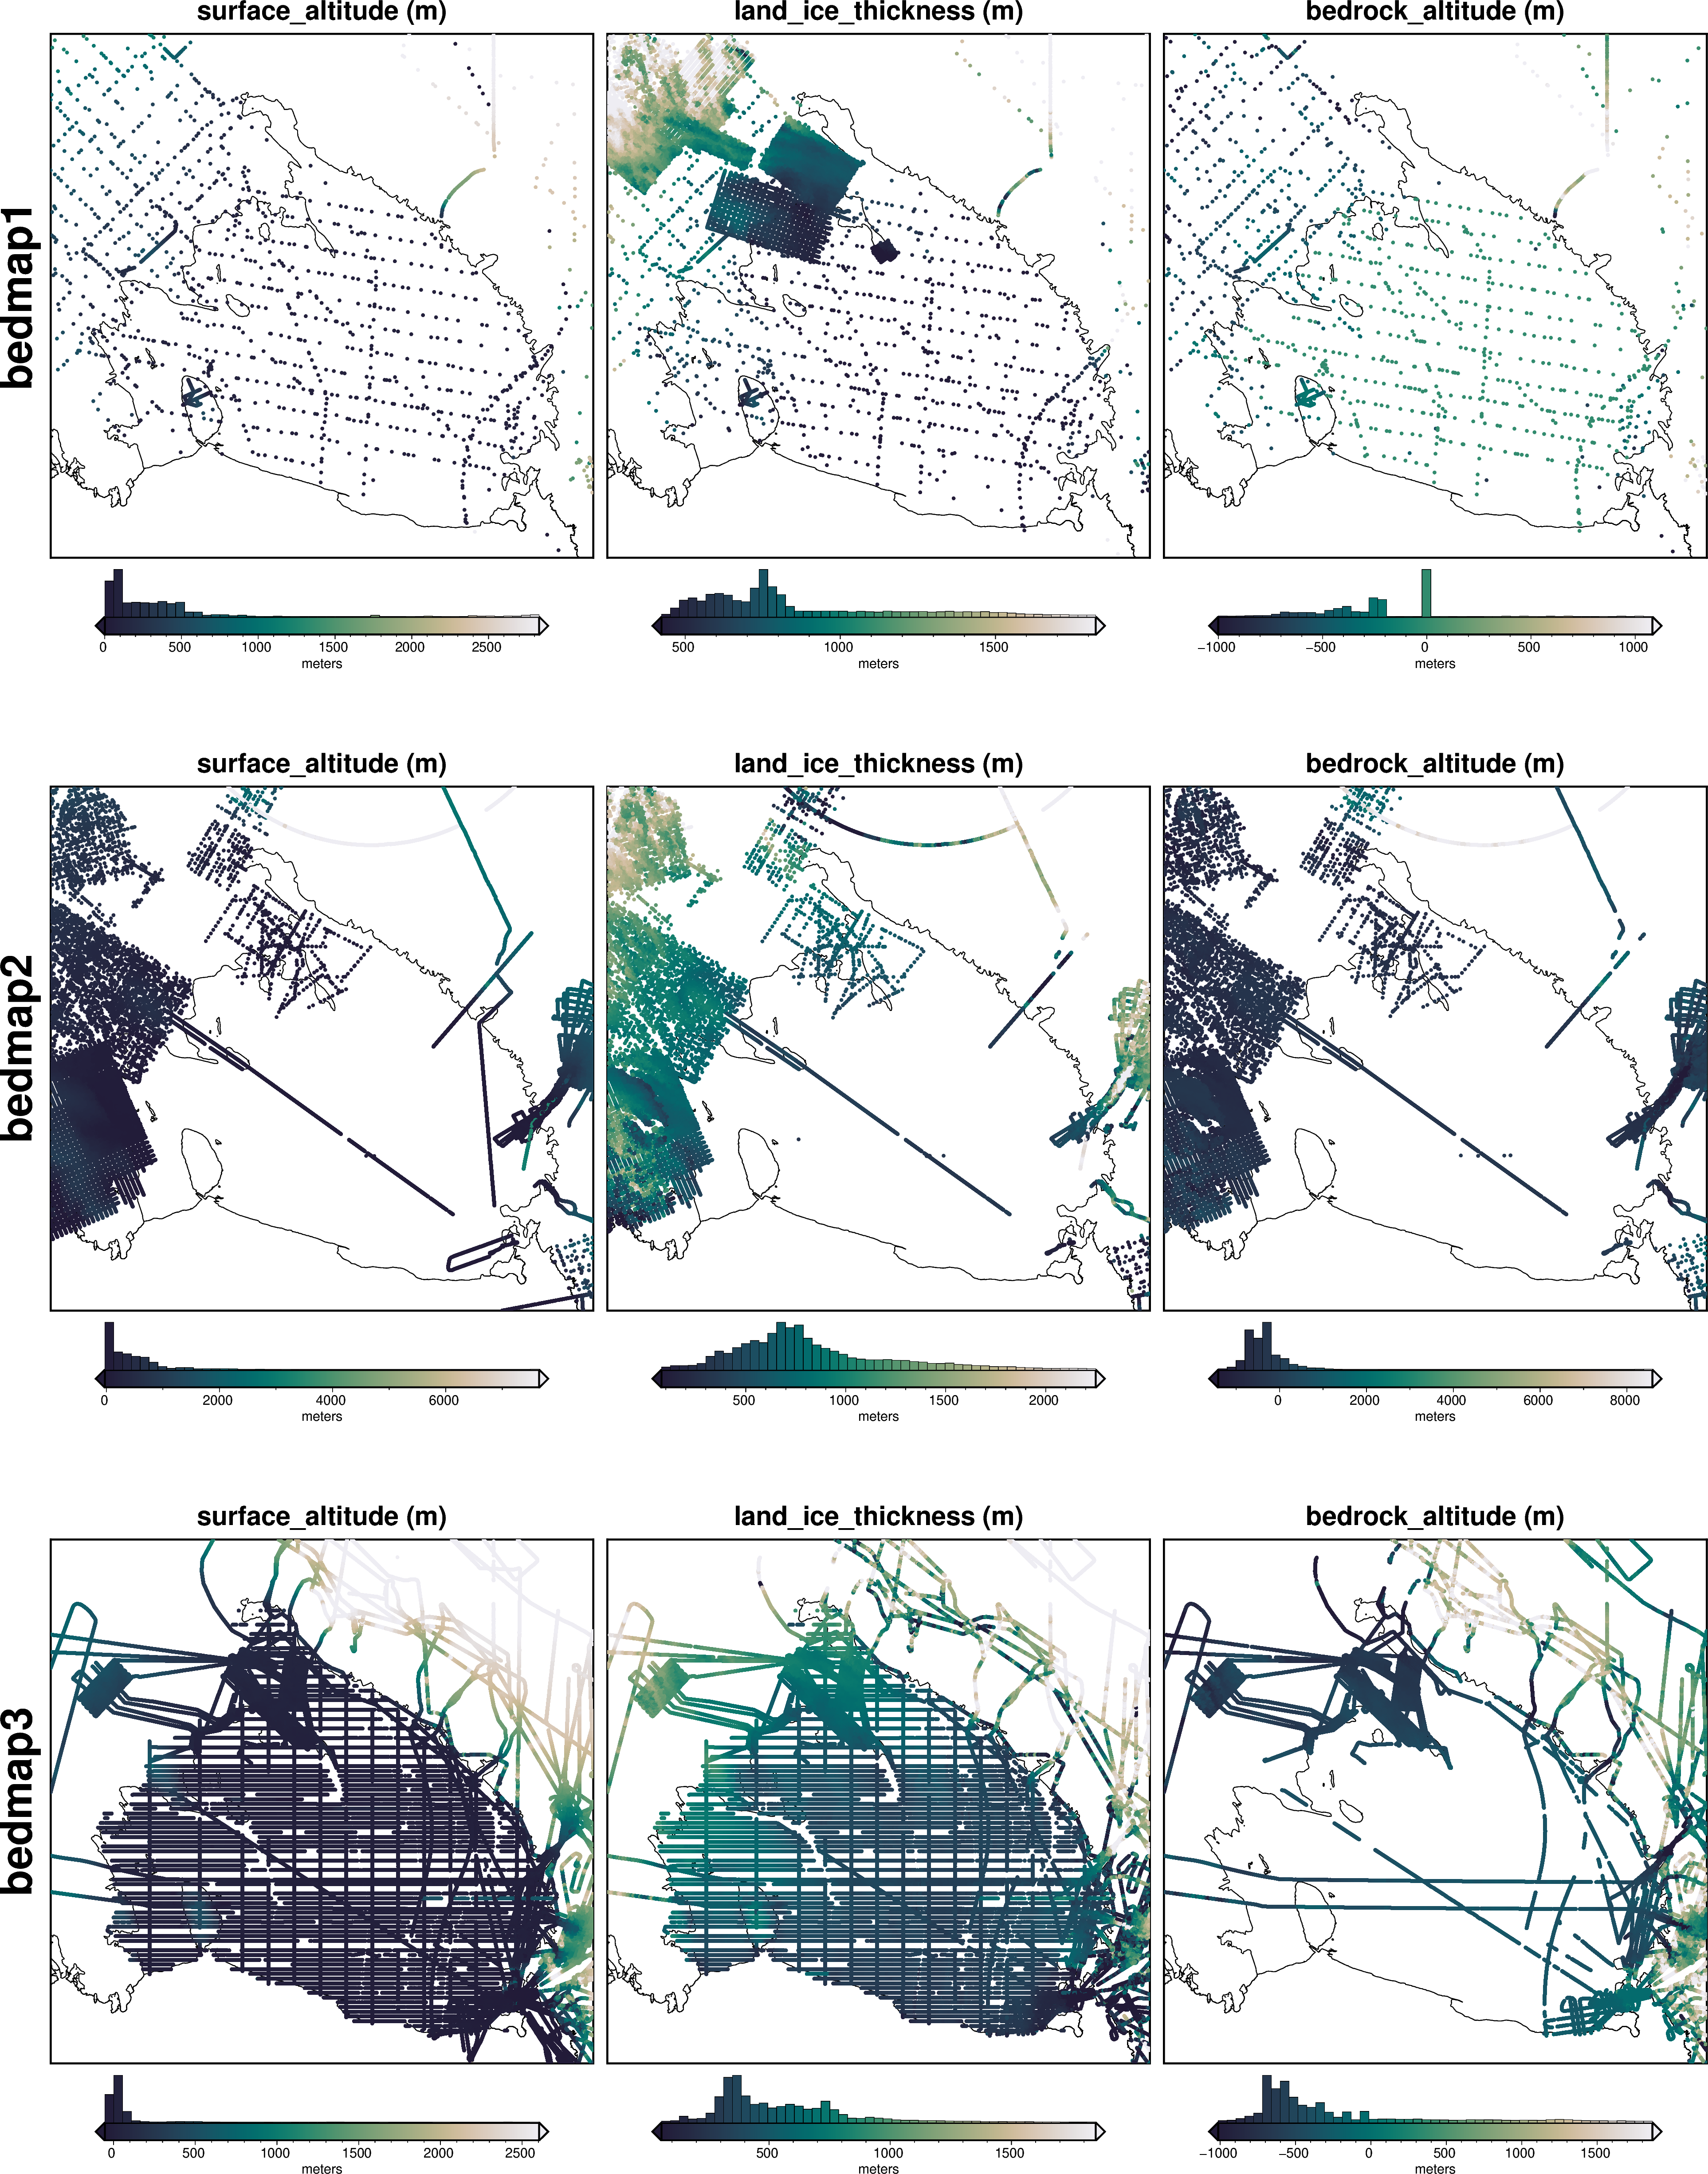

In [4]:
for row, (version, df) in enumerate(zip(version_names, dfs, strict=False)):
    for col, data_str in enumerate(data_to_plot[row]):
        yshift_amount = -1.1
        if (col == 0) and (row == 0):
            origin_shift = "initialize"
            fig = None
            xshift_amount = 1
        elif col == 0:
            # shift left and down
            origin_shift = "both"
            xshift_amount = -1 * len(data_to_plot[row - 1]) + 1
        else:
            origin_shift = "x"
            xshift_amount = 1

        points = df.dropna(subset=data_str)
        fig = maps.basemap(
            fig=fig,
            origin_shift=origin_shift,
            xshift_amount=xshift_amount,
            yshift_amount=yshift_amount,
            region=region,
            coast=True,
            title=data_str,
            hemisphere="south",
            points=points[::10],  # only plot every 10th point
            points_fill=data_str,
            points_cmap="rain",
            points_pen=None,
            points_style="c.1c",
            robust=True,
            colorbar=True,
            hist=True,
            reverse_cpt=True,
            cbar_label="meters",
        )
        if col == 0:
            fig.text(
                position="LM",
                justify="CM",
                offset="-1/0",
                angle=90,
                text=version,
                font="35p,Helvetica-Bold",
                no_clip=True,
            )

fig.show(dpi=200)